In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
import prophet

In [2]:
def get_stock_data(stock_ticker, start_date="2024-09-01", end_date="2024-10-31"):
    # Download historical stock data
    data = yf.download(stock_ticker, start=start_date, end=end_date)

    # Check if data is fetched successfully
    if data.empty:
        print(f"No data found for {stock_ticker}. Please check the ticker and try again.")
        return None
    
    # Rename columns to match requested fields
    data.rename(columns={
        'Adj Close': 'Adj Close', 'Open': 'Open', 'High': 'High',
        'Low': 'Low', 'Close': 'Close', 'Volume': 'Volume'
    }, inplace=True)

    # Reset index to have Date as a column
    data.reset_index(inplace=True)
    return data


In [3]:
def main():
    # Take stock ticker input from the user
    stock_name = input("Enter the stock ticker (e.g., RELIANCE.NS for Reliance on NSE): ")
    
    # Get data
    stock_data = get_stock_data(stock_name)
    # Save data to CSV file if data is available
    file_name = f"{stock_name}.csv"
    stock_data.to_csv(file_name, index=False)
    print(f"\nData for {stock_name} has been saved to {file_name} successfully.")


    # Display data or save to a file
    if stock_data is not None:
        print(stock_data.head())  # Display first few rows
        # Uncomment below to save the data to a CSV file
        # stock_data.to_csv(f"{stock_name}_historical_data.csv", index=False)
        print(f"\nData for {stock_name} has been fetched successfully.")
        

if __name__ == "__main__":
    main()


Enter the stock ticker (e.g., RELIANCE.NS for Reliance on NSE):  ANANTRAJ.NS


[*********************100%***********************]  1 of 1 completed


Data for ANANTRAJ.NS has been saved to ANANTRAJ.NS.csv successfully.
Price                       Date   Adj Close       Close        High  \
Ticker                           ANANTRAJ.NS ANANTRAJ.NS ANANTRAJ.NS   
0      2024-09-02 00:00:00+00:00  593.349976  593.349976  606.700012   
1      2024-09-03 00:00:00+00:00  604.400024  604.400024  610.950012   
2      2024-09-04 00:00:00+00:00  611.750000  611.750000  615.950012   
3      2024-09-05 00:00:00+00:00  624.500000  624.500000  629.500000   
4      2024-09-06 00:00:00+00:00  613.400024  613.400024  628.799988   

Price          Low        Open      Volume  
Ticker ANANTRAJ.NS ANANTRAJ.NS ANANTRAJ.NS  
0       591.200012  599.799988      731708  
1       593.000000  595.200012     1048805  
2       595.099976  598.849976     1165960  
3       612.500000  615.000000     1568744  
4       609.000000  628.799988     1015420  

Data for ANANTRAJ.NS has been fetched successfully.


In [4]:
data = pd.read_csv("ANANTRAJ.NS.csv")
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,NaN,ANANTRAJ.NS,ANANTRAJ.NS,ANANTRAJ.NS,ANANTRAJ.NS,ANANTRAJ.NS,ANANTRAJ.NS
1,2024-09-02 00:00:00+00:00,593.3499755859375,593.3499755859375,606.7000122070312,591.2000122070312,599.7999877929688,731708
2,2024-09-03 00:00:00+00:00,604.4000244140625,604.4000244140625,610.9500122070312,593.0,595.2000122070312,1048805
3,2024-09-04 00:00:00+00:00,611.75,611.75,615.9500122070312,595.0999755859375,598.8499755859375,1165960
4,2024-09-05 00:00:00+00:00,624.5,624.5,629.5,612.5,615.0,1568744


In [5]:
# Drop the first row (index 0)
data = data.drop(index=0)

# Reset the index if desired
data.reset_index(drop=True, inplace=True)
data
# Display the updated DataFrame
print(data)


                         Date          Adj Close              Close  \
0   2024-09-02 00:00:00+00:00  593.3499755859375  593.3499755859375   
1   2024-09-03 00:00:00+00:00  604.4000244140625  604.4000244140625   
2   2024-09-04 00:00:00+00:00             611.75             611.75   
3   2024-09-05 00:00:00+00:00              624.5              624.5   
4   2024-09-06 00:00:00+00:00  613.4000244140625  613.4000244140625   
5   2024-09-09 00:00:00+00:00  608.5999755859375  608.5999755859375   
6   2024-09-10 00:00:00+00:00  609.5499877929688  609.5499877929688   
7   2024-09-11 00:00:00+00:00  619.9000244140625  619.9000244140625   
8   2024-09-12 00:00:00+00:00  637.4000244140625  637.4000244140625   
9   2024-09-13 00:00:00+00:00  645.8499755859375  645.8499755859375   
10  2024-09-16 00:00:00+00:00             647.75             647.75   
11  2024-09-17 00:00:00+00:00  649.5999755859375  649.5999755859375   
12  2024-09-18 00:00:00+00:00  663.7999877929688  663.7999877929688   
13  20

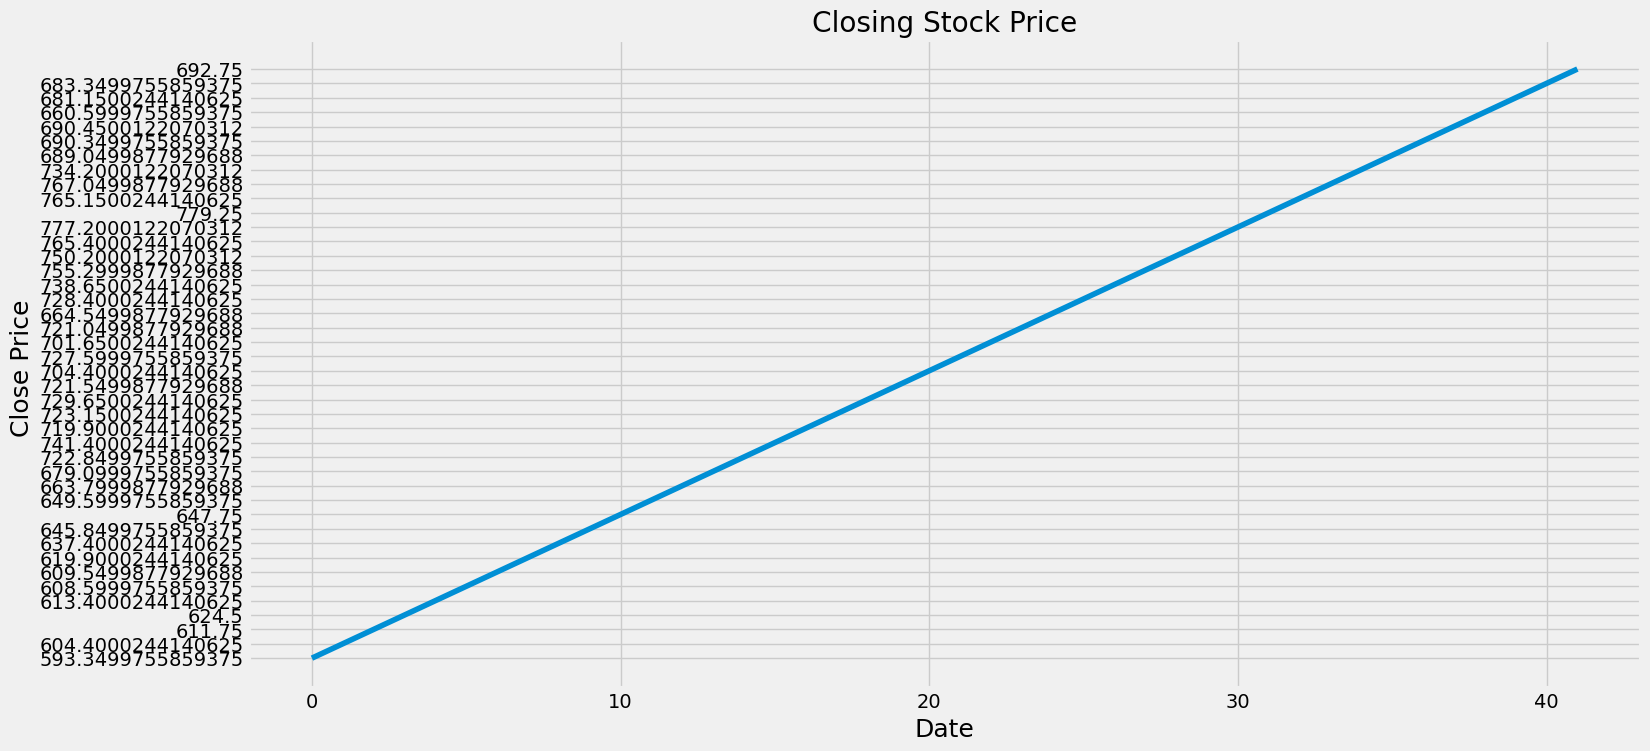

In [6]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price ", fontsize=18)
plt.show()

In [7]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2024-09-02 00:00:00+00:00,593.3499755859375
1,2024-09-03 00:00:00+00:00,604.4000244140625
2,2024-09-04 00:00:00+00:00,611.75
3,2024-09-05 00:00:00+00:00,624.5
4,2024-09-06 00:00:00+00:00,613.4000244140625


In [8]:
import pandas as pd
from prophet import Prophet

# Assuming 'data' is your DataFrame with 'ds' and 'y' columns

# Convert 'ds' to timezone-naive datetime
data['ds'] = pd.to_datetime(data['ds']).dt.tz_localize(None)

# Initialize and fit the Prophet model
m = Prophet(daily_seasonality=True)
m.fit(data)


10:47:59 - cmdstanpy - INFO - Chain [1] start processing
10:48:00 - cmdstanpy - INFO - Chain [1] done processing


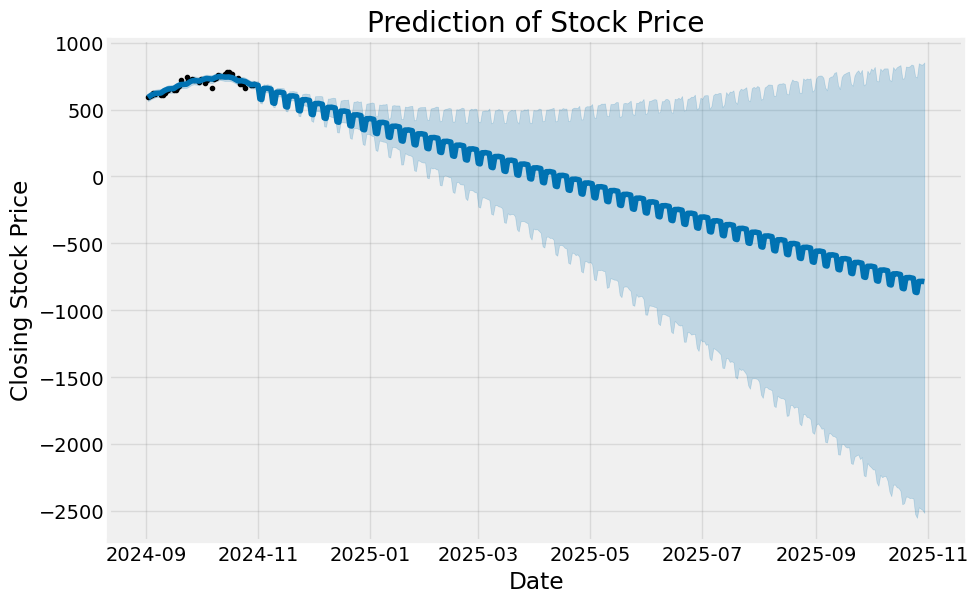

In [9]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

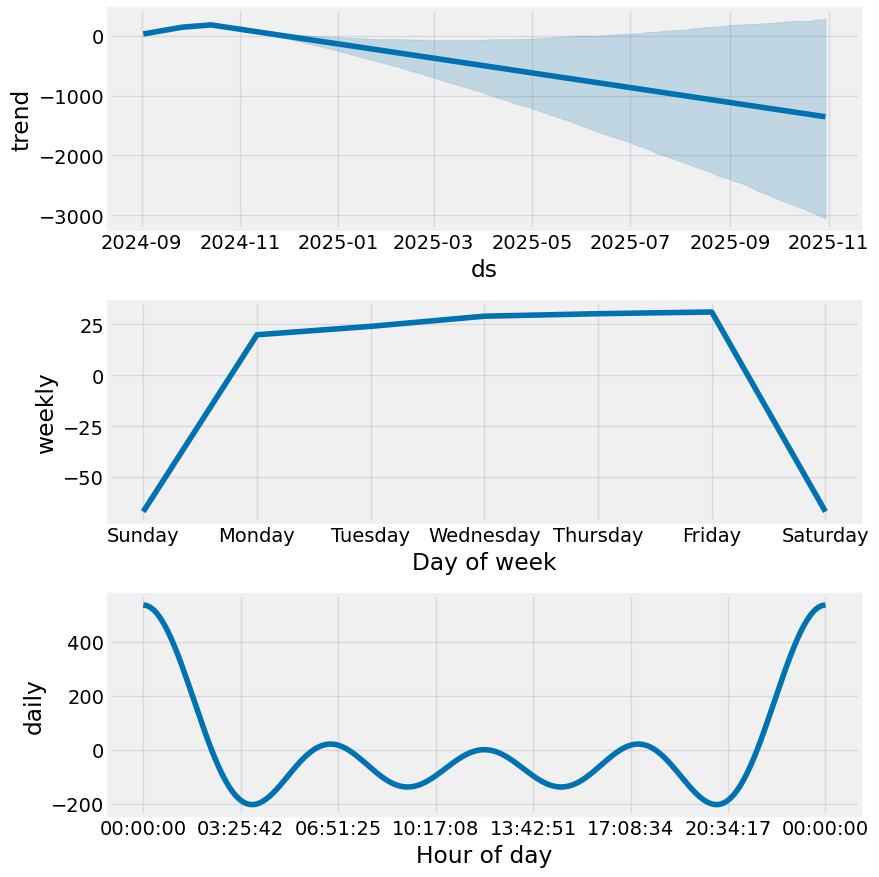

In [10]:
m.plot_components(predictions)
plt.show()